<a href="https://colab.research.google.com/github/kjghfnxggdgbvg/kjghfnxggdgbvg/blob/main/Copy_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report ,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

READ THE DATASET

In [3]:
data1 = pd.read_csv("/content/SalaryData_Train(1).csv")
data2 = pd.read_csv("/content/SalaryData_Test(1).csv")

In [4]:
data1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:

data2

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
data1.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
data2.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


**checking duplicates**

In [10]:
data1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [11]:
data2.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

**get dummies**

In [12]:
data1['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [14]:
data1['workclass'] = label_encoder.fit_transform(data1['workclass'])

data1['workclass'].unique()

array([5, 4, 2, 0, 1, 3, 6])

In [15]:
data1['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [16]:
data1['education'] = label_encoder.fit_transform(data1['education'])

data1['education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  5, 10,  8, 14,  4,  0, 13,  2,  3])

In [17]:
data1['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [18]:
data1['maritalstatus'] = label_encoder.fit_transform(data1['maritalstatus'])

data1['maritalstatus'].unique()

array([4, 2, 0, 3, 5, 1, 6])

In [19]:
data1['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [20]:

data1['relationship'] = label_encoder.fit_transform(data1['relationship'])

data1['relationship'].unique()

array([1, 0, 5, 3, 4, 2])

In [21]:
data1['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [22]:
data1['race'] = label_encoder.fit_transform(data1['race'])

data1['race'].unique()

array([4, 2, 1, 0, 3])

In [23]:
data1['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [24]:
data1['occupation'] = label_encoder.fit_transform(data1['occupation'])

data1['occupation'].unique()

array([ 0,  3,  5,  9,  7, 11, 13,  4,  6, 12,  2, 10,  1,  8])

In [25]:
data1['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [26]:
data1['sex'] = label_encoder.fit_transform(data1['sex'])

data1['sex'].unique()

array([1, 0])

In [27]:
data1['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [28]:
data1['native'] = label_encoder.fit_transform(data1['native'])

data1['native'].unique()

array([37,  4, 21, 17, 24, 31, 14,  8,  1, 10, 18, 28, 29,  3,  0, 35,  6,
       23, 34, 13, 30,  5,  7,  9, 12, 20,  2, 33, 22, 39, 27, 26, 32, 36,
       11, 25, 38, 15, 19, 16])

In [29]:
data1['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [30]:
data1['Salary'] = label_encoder.fit_transform(data1['Salary'])

data1['Salary'].unique()

array([0, 1])

In [31]:
data2['workclass'].unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [32]:
data2['workclass'] = label_encoder.fit_transform(data2['workclass'])

data2['workclass'].unique()

array([2, 1, 4, 0, 5, 3, 6])

In [33]:
data2['education'].unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [34]:
data2['education'] = label_encoder.fit_transform(data2['education'])

data2['education'].unique()

array([ 1, 11,  7, 15,  0, 14,  5,  9, 12,  4,  8,  6, 10,  2,  3, 13])

In [35]:
data2['maritalstatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [36]:
data2['maritalstatus'] = label_encoder.fit_transform(data2['maritalstatus'])

data2['maritalstatus'].unique()

array([4, 2, 6, 5, 0, 3, 1])

In [37]:
data2['relationship'].unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [38]:
data2['relationship'] = label_encoder.fit_transform(data2['relationship'])

data2['relationship'].unique()

array([3, 0, 1, 4, 5, 2])

In [39]:
data2['race'].unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [40]:
data2['race'] = label_encoder.fit_transform(data2['race'])

data2['race'].unique()

array([2, 4, 3, 0, 1])

In [41]:
data2['occupation'].unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [42]:
data2['occupation'] = label_encoder.fit_transform(data2['occupation'])

data2['occupation'].unique()

array([ 6,  4, 10,  7,  9,  2,  0,  3, 12, 11,  8, 13,  5,  1])

In [43]:
data2['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [44]:
data2['sex'] = label_encoder.fit_transform(data2['sex'])

data2['sex'].unique()

array([1, 0])

In [45]:
data2['native'].unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [46]:
data2['native'] = label_encoder.fit_transform(data2['native'])

data2['native'].unique()

array([37, 27, 12, 24,  5, 19, 10, 28, 35, 13,  7, 31, 38, 33,  3, 22, 17,
        0, 29, 23,  8,  4, 34, 20,  1, 30,  2, 25, 14, 18, 32, 21,  6, 39,
       16, 15, 11, 36, 26,  9])

In [47]:
data2['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
data2['Salary'] = label_encoder.fit_transform(data2['Salary'])

data2['Salary'].unique()

array([0, 1])

**NO MISSING VALUE**

**OUTLIERS DETECTION**

In [49]:
data1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79964e1930>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79964e1e70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79964e1690>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79964e23b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79964e2650>],
 'means': []}

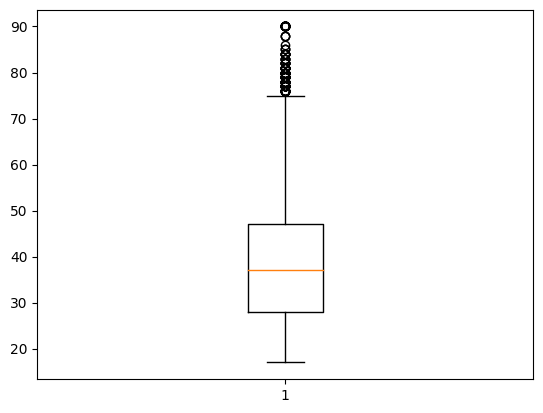

In [50]:
data_box= data1.dropna()
datal_box= data_box['age']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7996402710>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7996402c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7996402470>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7996403190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7996403430>],
 'means': []}

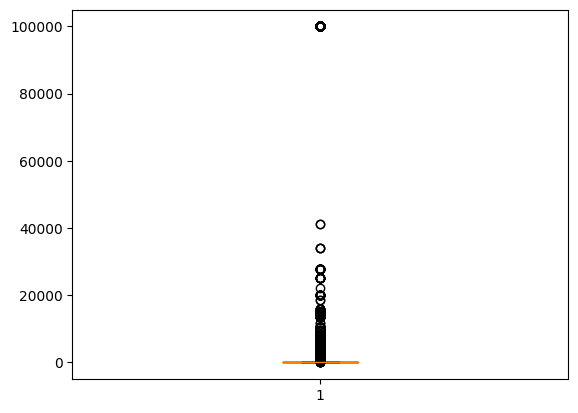

In [51]:
data_box= data1.dropna()
datal_box= data_box['capitalgain']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f799628d660>,
 'caps': [<matplotlib.lines.Line2D at 0x7f799628dba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f799628d3c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f799628e0e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f799628e380>],
 'means': []}

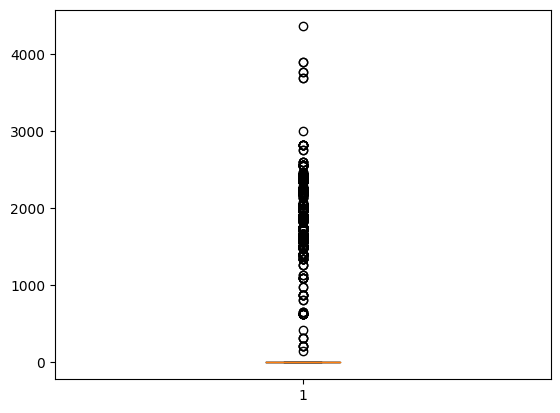

In [52]:
data_box= data1.dropna()
datal_box= data_box['capitalloss']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79962e2170>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79962e3b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79962e3460>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79963140a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7996314340>],
 'means': []}

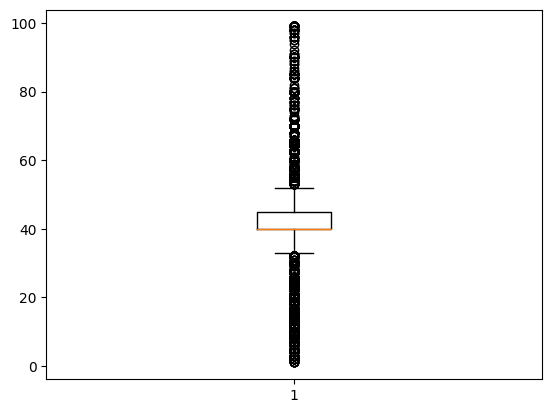

In [53]:
data_box= data1.dropna()
datal_box= data_box['hoursperweek']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79963621d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7996362710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7996361f30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7996362c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7996362ef0>],
 'means': []}

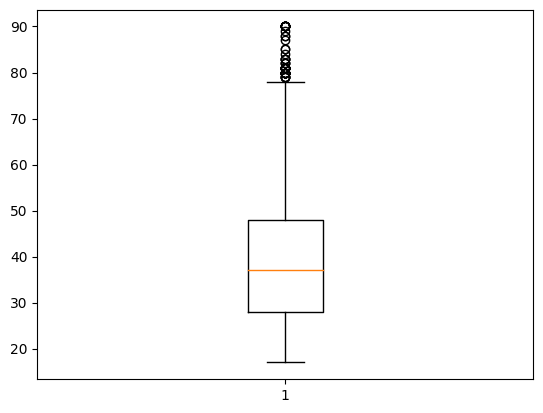

In [54]:
data_box= data2.dropna()
datal_box= data_box['age']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79961da2c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79961da800>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79961da020>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79961dad40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79961dafe0>],
 'means': []}

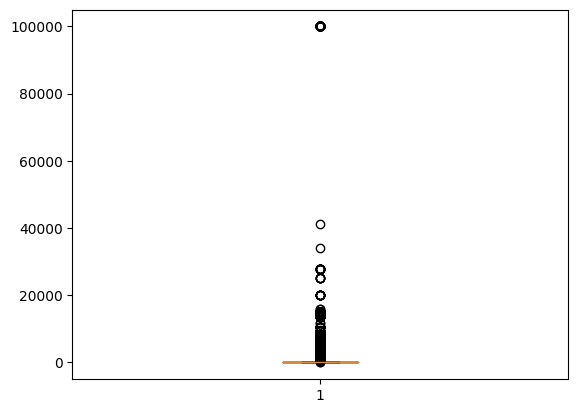

In [55]:
data_box= data2.dropna()
datal_box= data_box['capitalgain']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79962611e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7996261720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7996260f40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7996261c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7996261f00>],
 'means': []}

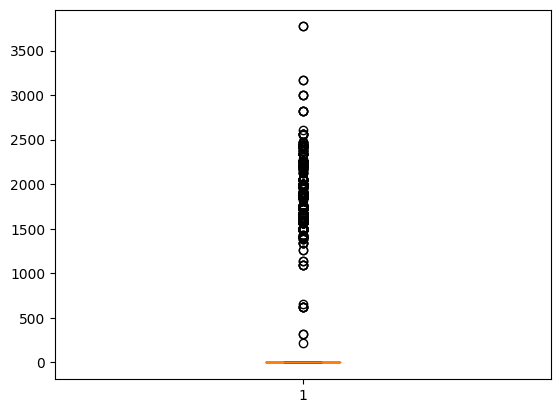

In [56]:
data_box= data2.dropna()
datal_box= data_box['capitalloss']
plt.boxplot(datal_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f79960dcfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f79960dd4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f79960dccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f79960dda20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f79960ddcc0>],
 'means': []}

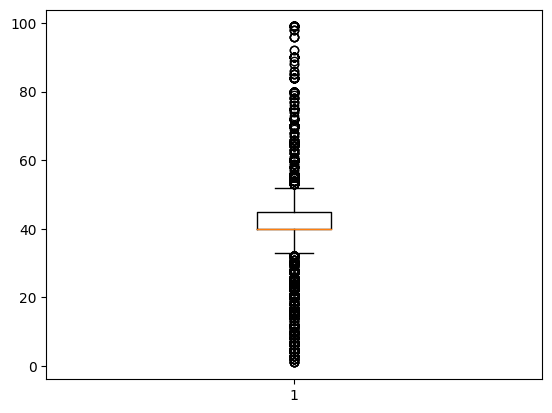

In [57]:
data_box= data2.dropna()
datal_box= data_box['hoursperweek']
plt.boxplot(datal_box)

**correlation analysis**

In [58]:
#import seaborn as sns
#sns.pairplot(data1)
#plt.suptitle('pairplot for all numeric values' , y=1.01, fontsize=17)


In [59]:
data1.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548,0.241991
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598,0.018040
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715,0.079013
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625,0.335287
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057,-0.193504
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298,0.051577
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661,-0.250998
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507,0.071666
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063,0.216680
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513,0.221195


In [60]:
#import seaborn as sns
#sns.pairplot(data2)
#plt.suptitle('pairplot for all numeric values' , y=1.01, fontsize=17)


In [61]:
data2.corr()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.096037,-0.007948,0.026123,-0.262577,-0.002214,-0.249701,0.024485,0.082265,0.078760,0.057745,0.102758,-0.005683,0.227469
workclass,0.096037,1.000000,0.018005,0.046623,-0.031329,0.021271,-0.060235,0.059749,0.059161,0.032980,0.010242,0.052614,-0.003635,0.011008
education,-0.007948,0.018005,1.000000,0.351486,-0.043117,-0.023999,-0.014227,0.012133,-0.026978,0.028626,0.020568,0.062892,0.077065,0.085554
educationno,0.026123,0.046623,0.351486,1.000000,-0.068079,0.093643,-0.081413,0.029355,-0.002052,0.131750,0.085817,0.133691,0.097188,0.327813
maritalstatus,-0.262577,-0.031329,-0.043117,-0.068079,1.000000,0.003854,0.185495,-0.073718,-0.120374,-0.042405,-0.034073,-0.171665,-0.016532,-0.191058
occupation,-0.002214,0.021271,-0.023999,0.093643,0.003854,1.000000,-0.047381,-0.001561,0.045244,0.014165,0.016580,0.011755,-0.001311,0.046218
relationship,-0.249701,-0.060235,-0.014227,-0.081413,0.185495,-0.047381,1.000000,-0.121481,-0.579212,-0.054040,-0.048091,-0.261905,0.000500,-0.258335
race,0.024485,0.059749,0.012133,0.029355,-0.073718,-0.001561,-0.121481,1.000000,0.088450,0.013539,0.015799,0.037125,0.125514,0.069227
sex,0.082265,0.059161,-0.026978,-0.002052,-0.120374,0.045244,-0.579212,0.088450,1.000000,0.044843,0.045360,0.231744,-0.014178,0.213863
capitalgain,0.078760,0.032980,0.028626,0.131750,-0.042405,0.014165,-0.054040,0.013539,0.044843,1.000000,-0.031876,0.090501,0.005923,0.220882


#**outliers detection**

In [62]:
data = data1.copy()

In [63]:
from sklearn.ensemble import IsolationForest

In [64]:
model = IsolationForest(contamination=0.01)

In [65]:
model.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [66]:
model.predict(data)

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
data1['Anomaly'] = model.predict(data)

In [68]:
data1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Anomaly
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0,1
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0,1
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0,1
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0,1
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0,1


In [69]:
data1[data1['Anomaly'] == -1]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Anomaly
48,47,2,14,15,2,9,5,4,0,0,1902,60,14,1,-1
145,71,4,15,10,5,11,4,2,1,0,1816,2,37,0,-1
360,44,2,15,10,2,0,5,4,0,0,2415,6,37,1,-1
645,31,2,9,13,6,11,4,4,0,0,1380,40,4,0,-1
648,46,2,10,16,0,9,4,4,0,25236,0,65,37,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29840,22,1,4,3,4,5,2,4,1,0,0,40,12,1,-1
29930,54,2,12,14,0,9,1,4,0,0,2559,40,37,1,-1
29957,74,4,9,13,6,2,1,4,1,15831,0,8,10,1,-1
29985,53,4,14,15,4,9,1,1,1,27828,0,40,28,1,-1


In [70]:
data1.iloc[0:4].mean()

age               45.00
workclass          3.25
education          7.50
educationno       10.50
maritalstatus      2.00
occupation         3.25
relationship       0.50
race               3.50
sex                1.00
capitalgain      543.50
capitalloss        0.00
hoursperweek      33.25
native            37.00
Salary             0.00
Anomaly            1.00
dtype: float64

In [71]:
Data = data2.copy()

In [72]:
model1 = IsolationForest(contamination=0.01)

In [73]:
model1.fit(Data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [74]:
model1.predict(Data)

array([1, 1, 1, ..., 1, 1, 1])

In [75]:
data2['Anomaly'] = model.predict(Data)

In [76]:
data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Anomaly
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0,1
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0,1
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0,1


In [77]:
data2[data2['Anomaly'] == -1]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Anomaly
318,39,2,11,9,0,3,4,2,0,99999,0,40,37,1,-1
328,50,4,14,15,2,9,0,4,1,99999,0,80,37,1,-1
352,58,4,10,16,1,3,5,4,0,0,1485,35,37,1,-1
476,64,5,3,2,2,4,0,3,1,0,0,45,3,0,-1
600,50,4,11,9,2,7,5,4,0,15024,0,20,37,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,17,0,1,7,4,0,3,0,0,0,0,15,37,0,-1
14429,65,2,5,4,6,8,1,4,0,0,3175,60,31,0,-1
14760,61,2,13,1,5,13,1,2,1,14344,0,40,37,1,-1
14855,59,3,14,15,2,3,0,4,1,99999,0,84,37,1,-1


In [78]:
data2.iloc[0:4].mean()

age                33.75
workclass           1.75
education           8.50
educationno         9.50
maritalstatus       2.50
occupation          6.50
relationship        0.75
race                3.00
sex                 1.00
capitalgain      1922.00
capitalloss         0.00
hoursperweek       42.50
native             37.00
Salary              0.50
Anomaly             1.00
dtype: float64

** in this data there is many outliers found**

#**Feature Selection using pps**

In [79]:
train = pd.read_csv("/content/SalaryData_Train(1).csv")

In [80]:
!pip install ppscore

In [81]:
import ppscore as pps

In [82]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [83]:
pps.score(train, 'age','Salary')

{'x': 'age',
 'y': 'Salary',
 'ppscore': 0.0275250998812985,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.652949523016713,
 'model': DecisionTreeClassifier()}

In [84]:
pps.score(train, 'educationno','Salary')

{'x': 'educationno',
 'y': 'Salary',
 'ppscore': 0.23669934850392518,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.7275982597072357,
 'model': DecisionTreeClassifier()}

In [85]:
pps.score(train, 'capitalgain','Salary')

{'x': 'capitalgain',
 'y': 'Salary',
 'ppscore': 0.2953947646508876,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.7485450956287072,
 'model': DecisionTreeClassifier()}

In [86]:
pps.score(train, 'capitalloss','Salary')

{'x': 'capitalloss',
 'y': 'Salary',
 'ppscore': 0.12713116190091397,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.688496282455044,
 'model': DecisionTreeClassifier()}

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
pps.score(train, 'workclass','Salary')

{'x': 'workclass',
 'y': 'Salary',
 'ppscore': 0.09274449232713386,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6762245928967938,
 'model': DecisionTreeClassifier()}

In [89]:
pps.score(train, 'occupation','Salary')

{'x': 'occupation',
 'y': 'Salary',
 'ppscore': 1.2546807699022753e-07,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.643126590313879,
 'model': DecisionTreeClassifier()}

In [90]:
pps.score(train, 'education','Salary')

{'x': 'education',
 'y': 'Salary',
 'ppscore': 0.23669934850392518,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.7275982597072357,
 'model': DecisionTreeClassifier()}

In [91]:
pps.score(train, 'maritalstatus','Salary')


{'x': 'maritalstatus',
 'y': 'Salary',
 'ppscore': 0.0007704246352128015,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6434014896386242,
 'model': DecisionTreeClassifier()}

In [92]:
pps.score(train, 'relationship','Salary')

{'x': 'relationship',
 'y': 'Salary',
 'ppscore': 0.11745970434947131,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6850447959889747,
 'model': DecisionTreeClassifier()}

In [93]:
pps.score(train, 'race','Salary')

{'x': 'race',
 'y': 'Salary',
 'ppscore': 1.2546807699022753e-07,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.643126590313879,
 'model': DecisionTreeClassifier()}

In [94]:
pps.score(train, 'sex','Salary')

{'x': 'sex',
 'y': 'Salary',
 'ppscore': 1.2546807699022753e-07,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.643126590313879,
 'model': DecisionTreeClassifier()}

In [95]:
pps.score(train, 'native','Salary')

{'x': 'native',
 'y': 'Salary',
 'ppscore': 0.0058121384503757294,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6431265455376529,
 'model_score': 0.6452007434642519,
 'model': DecisionTreeClassifier()}

occupation,sex,race,maritalstatus has less value ppscore hence delete those columns

In [96]:
data1.drop('occupation',axis=1,inplace=True)
data2.drop('occupation',axis=1,inplace=True)

In [97]:
data1.drop('race',axis=1,inplace=True)
data2.drop('race',axis=1,inplace=True)

In [98]:
data1.drop('sex',axis=1,inplace=True)
data2.drop('sex',axis=1,inplace=True)

In [99]:
data1.drop('maritalstatus',axis=1,inplace=True)
data2.drop('maritalstatus',axis=1,inplace=True)

**SPLIT THE DATA**

In [100]:
X_train = data1.drop(['Salary'],axis=1)
y_train = data1[['Salary']]

In [101]:
X_test = data2.drop(['Salary'],axis=1)
y_test = data2[['Salary']]

In [102]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30161, 10), (15060, 10), (30161, 1), (15060, 1))

**BUILD THE MODEL**

In [103]:
model = SVC(C=0.5, gamma=0.01, kernel='rbf')

In [104]:
model.fit(X_train,y_train)

SVC(C=0.5, gamma=0.01)

In [105]:
train_pred = model.predict(X_train)

In [106]:
confusion_matrix(y_train,train_pred)

array([[21909,   744],
       [ 3717,  3791]])

In [107]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     22653
           1       0.84      0.50      0.63      7508

    accuracy                           0.85     30161
   macro avg       0.85      0.74      0.77     30161
weighted avg       0.85      0.85      0.84     30161



In [108]:
test_pred = model.predict(X_test)

In [109]:
confusion_matrix(y_test, test_pred)

array([[10939,   421],
       [ 1992,  1708]])

In [110]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     11360
           1       0.80      0.46      0.59      3700

    accuracy                           0.84     15060
   macro avg       0.82      0.71      0.74     15060
weighted avg       0.84      0.84      0.82     15060



HYPERPARAMETER TUNING

In [111]:
#from sklearn.model_selection import GridSearchCV

In [112]:
#pgrid = [
#   {
#       'C':[0.4,0.45,0.5,0.55,0.6],
#       'gamma':[0.1,0.01,1]
 #   }

#]

In [113]:
#model = SVC(kernel='rbf')

In [114]:
#grid = GridSearchCV(model,param_grid=pgrid, cv=10)

In [115]:
#grid.fit(X_train,y_train)

In [116]:
#grid.best_params_,grid.best_score_

VISUALIZE THE DATA

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf_model = RandomForestClassifier(n_estimators=20, max_depth=8, random_state=42)

In [119]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=20, random_state=42)

In [120]:
train_pred = rf_model.predict(X_train)


In [121]:
confusion_matrix(y_train,train_pred)

array([[21764,   889],
       [ 3473,  4035]])

In [122]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     22653
           1       0.82      0.54      0.65      7508

    accuracy                           0.86     30161
   macro avg       0.84      0.75      0.78     30161
weighted avg       0.85      0.86      0.84     30161



In [123]:
test_pred = rf_model.predict(X_test)

In [124]:
confusion_matrix(y_test,test_pred)

array([[10876,   484],
       [ 1766,  1934]])

In [125]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     11360
           1       0.80      0.52      0.63      3700

    accuracy                           0.85     15060
   macro avg       0.83      0.74      0.77     15060
weighted avg       0.85      0.85      0.84     15060



# *where gridsearh taking more time execute so i have commented the code*